# Polymer models: Debye coil and Guinier
This notebook covers the two polymer-related intensity models included in the library.

Important:
- Debye coil and Guinier are **intensity-only** models in this codebase.
- They are written in terms of the radius of gyration **Rg**.

We plot the intensity as $|F(q)|^2$ to match the rest of the library/app vocabulary.

In [1]:
from _bootstrap import add_src_to_path
repo_root = add_src_to_path()

import numpy as np
import matplotlib.pyplot as plt

from rayleigh_gans.form_factors import (
    P_gaussian_coil_q,
    P_guinier_q,
)

plt.rcParams["figure.dpi"] = 120


## Debye (Gaussian coil) vs Guinier
Guinier is the small-q approximation and should match Debye for small q.

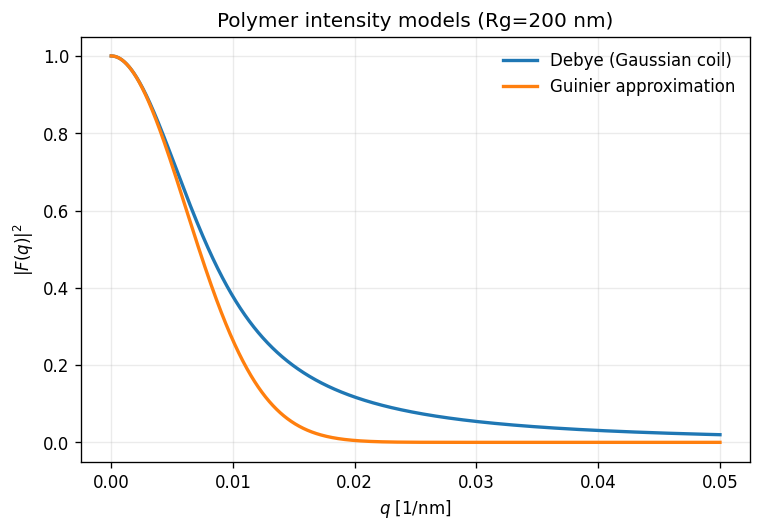

In [4]:
Rg = 200.0  # nm
q = np.linspace(0, 0.05, 1500)  # focus on small-q region

I_debye = P_gaussian_coil_q(q, Rg)   # intensity-like
I_guinier = P_guinier_q(q, Rg)

plt.figure(figsize=(7.2,4.6))
plt.plot(q, I_debye, label="Debye (Gaussian coil)", linewidth=2.0)
plt.plot(q, I_guinier, label="Guinier approximation", linewidth=2.0)
plt.xlabel(r"$q$ [1/nm]")
plt.ylabel(r"$|F(q)|^2$")
plt.title(f"Polymer intensity models (Rg={Rg:g} nm)")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False)
plt.show()


## Guinier plot (classic)

A Guinier plot is typically **ln(I)** versus **q²**.  
In the Guinier regime (small q, typically **q·Rg ≲ 1**), the intensity is approximately:

$$ I(q) \approx I(0)\exp\!\left(-\frac{q^2 R_g^2}{3}\right) $$

Taking the natural logarithm gives:

$$ \ln I(q) \approx \ln I(0) - \frac{q^2 R_g^2}{3} $$

So a plot of **ln(I)** versus **q²** is approximately linear with slope **−Rg²/3**.
For the normalized intensities used here, **I(0)=1**, so **ln I(0)=0**.

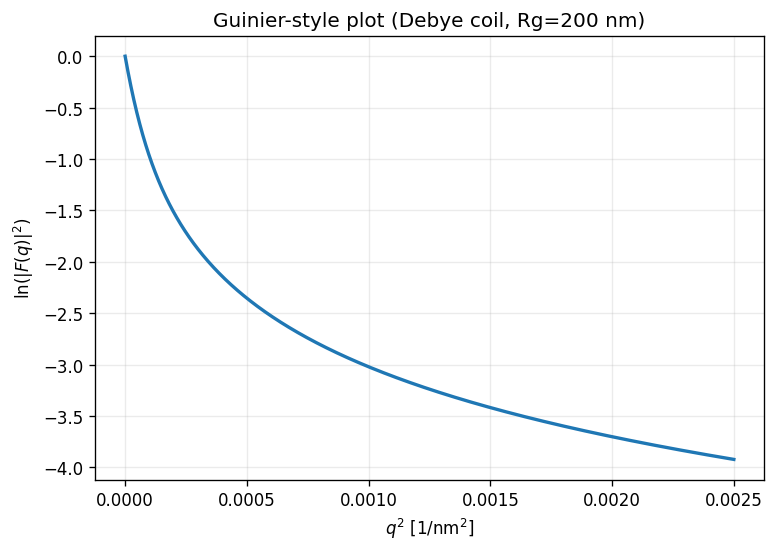

In [10]:
Rg = 200.0
q = np.linspace(0, 0.05, 1000)

I = P_gaussian_coil_q(q, Rg)
# Avoid log(0)
I = np.clip(I, 1e-300, None)

plt.figure(figsize=(7.2,4.8))
plt.plot(q**2, np.log(I), linewidth=2.0)
plt.xlabel(r"$q^2$ [1/nm$^2$]")
plt.ylabel(r"$\ln(|F(q)|^2)$")
plt.title(f"Guinier-style plot (Debye coil, Rg={Rg:g} nm)")
plt.grid(True, alpha=0.25)
plt.show()


## Rg sweep
Changing Rg changes the decay scale in q. Larger Rg shifts features to smaller q.

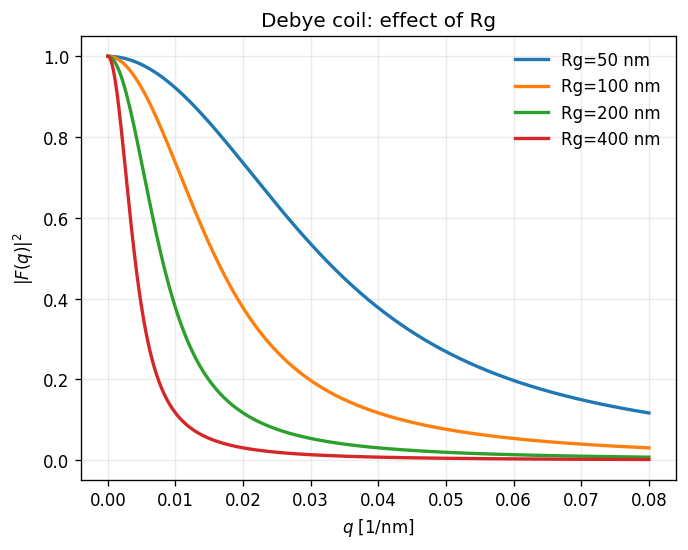

In [6]:
q = np.linspace(0, 0.08, 2000)
for Rg in [50.0, 100.0, 200.0, 400.0]:
    I = P_gaussian_coil_q(q, Rg)
    plt.plot(q, I, label=f"Rg={Rg:g} nm", linewidth=2.0)

plt.xlabel(r"$q$ [1/nm]")
plt.ylabel(r"$|F(q)|^2$")
plt.title("Debye coil: effect of Rg")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False)
plt.show()
